<a href="https://colab.research.google.com/github/hypro2/LLM-Multimodal-Colab/blob/main/llm/Meta_Llama_3_8B_Instruct_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 트랜스포머
!pip install -U -q transformers

# 양자화
!pip install -U -q accelerate bitsandbytes
!pip install -U -q autoawq

# 임베딩
!pip install -q llm2vec
!pip install -q flash-attn --no-build-isolation

Acess Token 입력

https://huggingface.co/settings/tokens

In [3]:
import os
import getpass

os.environ["HF_TOKEN"] = getpass.getpass("HF_TOKEN:")

In [4]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, TextStreamer

model_id = "WIPSAI/Llama-3-8B-Instruct-Patent-QA"

tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(model_id,
                                             return_dict=True,
                                             torch_dtype='auto',
                                             device_map='auto',
                                             do_sample=True,
                                             load_in_4bit=True, # bitsandbytes 설치
                                            )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:81: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/51.3k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00007.safetensors:   0%|          | 0.00/4.89G [00:00<?, ?B/s]

model-00002-of-00007.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00003-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00005-of-00007.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00006-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00007-of-00007.safetensors:   0%|          | 0.00/2.57G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/194 [00:00<?, ?B/s]

In [11]:
text = """[TECHNICAL FIELD] [0001] By using the mineral ion active water the invention sterilizes the penicillium growing up under the surface of the Lentinus edodes sawdust media. It relates to increase the mineral component among the nutrient component of the produced Lentinus edodes and cultivate. [BACKGROUND ART] [0002] The method of production is the mode cultivated to the edible mushrooms interest medicinal mushroom which the Lentinus edodes populars is known in 1 year to the material wood produced with two times changed among the year into the sawdust of black oak culture medium can cultivate. In house, the year arbitration times is become easy that the various germs therefore propagates in the sawdust media. The double penicillium widely spreads to the sawdust media. It buries in the Lentinus edodes and the marketability is dropt down and the income of the farmhouse is fallen. [0003] It had the existing different attempt (the chemicals usage etc. it sprinkles alcohol it cleans with the loofah) for sterilizing the penicillium but the certain removal of the penicillium cannot. [DISCLOSURE OF THE INVENTION] [0004] The present invention is to provide the Lentinus edodes cultivation method in which it does not use the method it sterilizes the penicillium to the physical chemical method by utilizing the mineral active ion number for the Lentinus edodes cultivation and for removing and it utterly sterilizes the penicillium to the method which is the environment-friendly even when the sterilizing power is excellent and it can remove and as to the Lentinus edodes, which and is cultivated the penicillium removal and mineral component can be strengthened. [0005] Like this, the invention is the mineral active ion number is provided to the consumer the Lentinus edodes in which it can obtain the Lentinus edodes excellent in terms of marketability in which the outer tube of the Lentinus edodes as well as the penicillium bactericidal action etc. is excellent in case of growing the Lentinus edodes by using and weight increases and especially, the mineral content is abundant. [0006] Moreover, it says to be very useful invention lice which grows the Lentinus edodes even though it does not use the drug for the rox or the poisonous general disinfection in the Lentinus edodes cultivation and has the effect that can become the big help in the health of the consumer. [BRIEF DESCRIPTION OF THE DRAWINGS] [0007] [DESCRIPTION OF EMBODIMENTS] [0008] The invention is made to be equal to specifically, next. [0009] It was clarified not to nearly give the toxicity the high voltage ion activated water to all virus wool human bodies at all and immediately completely sterilize with contact. Since it each other is absorbed has the positive charge (+) has the negative charge () the sterilization process principles of the mineral ion active water sterilizes. This is made to be equal to next, it organizes. [0010] The bacteria body temperature is dropt down - all metallic ions the thermal conductance is high and the bacteria body temperature is rapidly comprised the ambient temperature and balance(35  20 ) [0011] The moisture evaporation accompanied with the dehydration - heat conduction of the bacteria(95% moisture  50% moisture) [0012]  The oxygen required for the respiratory metabolism of the suffocation bacteria of the bacteria is snatched. [0013]  The positive charge (+) of the break down - mineral ion of the bacteria shell destroys the cell membrane. [0014] Moreover, the mineral content of the mineral ion active water is same as those of [table 1]. [0015] [ 1] The mineral content of the mineral ion active water. Sample distillation. Inorganic material (unit : mg/L) pH K Ca Mg Fe Na Mineral active ion number. 1300.0 65.0 3.30 0.01 57.0 7.10(17.3) Subsurface water (raw water) 6.3 29.0 3.6 0.01 13.0 7.30(13.6) [0016] [Table 1] The mineral (K, Ca, Mg) of the mineral active ion number very much showed up in comparison with the subsurface water as there appeared. As a result of this, it means in case of using in all kinds of the plant cultivations or the food processing obtaining the strengthening effect of the mineral nutrient. It requested to Korea Testing and Research Institute for Chemical with the KSM testing method and it analyzed the mineral component analysis of the active ion number. [0017] It is explained in the ionic activity number manufacturing device patent using the high voltage of 10-2001-0025030 applied for patent and the cultivation method which here is not manufacturing method decides to be illustrated the manufacturing method of the mineral active ion number for the invention penicillium sterilization. [0018] The experiment for finding out the quality characteristic of the Lentinus edodes which it cultivated by using the bactericidal action of the penicillium of the Lentinus edodes sawdust media using the mineral active ion number obtained to the patent product described in the above and mineral active ion number was performed like the next. [0019] Firstly, it sprinkled on the Lentinus edodes sawdust media through the mist blower which it set up in the Lentinus edodes cultivation house in the experiment for the bactericidal action explaining after receiving the mineral active ion number in the reservoir box of 3 tone with the bis die, the church for 15 minutes, and 15 and the sterilizing power of the penicillium generated with the generation whether or not of the penicillium was measured. [0020] The result showed in the next table 2. [0021] [ 2] The penicillium bactericidal test by the mineral active ion number. Treatment plot. Sawdust media changes in appearance. 3 primary. 6 primary. 9 primary. 12 primary. 15 primary. The sawdust media which is not polluted in the penicillium. It and the penicillium generation will not be achieved. It and the penicillium generation will not be achieved. It and the penicillium generation will not be achieved. It and the penicillium generation will not be achieved. It and the penicillium generation will not be achieved. The sawdust media polluted by 30% under in the penicillium. Penicillium 30% contamination. Penicillium 15% contamination. Penicillium 5% contamination. Penicillium contamination none. Penicillium contamination none. The sawdust media polluted in the penicillium with 50~70%. Penicillium 70% contamination. Penicillium 50% contamination. Penicillium 30% contamination. Penicillium 5% contamination. Penicillium contamination none. [0022] As shown in the above table 2, the bactericidal action of the Lentinus edodes sawdust media penicillium of the mineral active ion number could obtain the very good result. [0023] That is, the function one-dimensionaled of just supplying moisture to the sawdust media and Lentinus edodes when using the general paper sewage was done. However when using the mineral active ion number the bactericidal action of the penicillium which was the decay factor of the sawdust media as well as the Hydration, one-dimensionaled very high showed up. Moreover, the deodorization effect of the characteristic of the various germs removal of the penicillium extrinsic and house inside incidentally kept pace and it showed up. [0024] It was excellent than the quality of the Lentinus edodes which it cultivated by using the mineral active ion number just cultivated in the exterior quality to the subsurface water. And with expecting the effect as the health food in which the mineral content was strengthened in case of the Lentinus edodes which as shown in the above table 3, was cultivated to the mineral active ion number it was determined. [0025] Like this, in case the final result of the present invention grows the Lentinus edodes by using the mineral active ion number the outer tube of the Lentinus edodes as well as the bactericidal action etc. is excellent. The excellent lentinus edodes in which especially, the mineral content is strengthened can be provided. And the weight increase and marketability of the Lentinus edodes are excellent and the income of the farming family is raised but it can help. [0026] [ 3] The Lentinus edodes cultivation experiment using the mineral active ion number. Sample distillation. Inorganic material (unit : mg) Piece average weight (g) K Ca Zn Fe The Lentinus edodes cultivated to the mineral active ion number. 650 45 32 35 35 The Lentinus edodes cultivated to the subsurface water (raw water). 256 4 0.28 1.2 25 [REFERENCE SIGNS LIST] [0027]"""

question =" What is the main purpose of the present invention and what problem does it solve?"

messages = [
    {"role": "system", "content": "You are a best AI patent expert. Let’s think step by step."},
    {"role": "user", "content": f'text:"{text}"\n\n{question}'}
]

encodeds = tokenizer.apply_chat_template(messages, add_generation_prompt=False, return_tensors="pt").to("cuda")

streamer = TextStreamer(tokenizer)

output = model.generate(inputs=encodeds,
                        max_new_tokens=256,
                        pad_token_id=tokenizer.eos_token_id,
                        top_p=0.7,
                        streamer=streamer,
                        eos_token_id=[
                            tokenizer.eos_token_id,
                            tokenizer.convert_tokens_to_ids("<|eot_id|>")
                        ])

decode_output = tokenizer.decode(output[0], skip_special_tokens=False, clean_up_tokenization_spaces=True)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You are a best AI patent expert. Let’s think step by step.<|eot_id|><|start_header_id|>user<|end_header_id|>

text:"[TECHNICAL FIELD] [0001] By using the mineral ion active water the invention sterilizes the penicillium growing up under the surface of the Lentinus edodes sawdust media. It relates to increase the mineral component among the nutrient component of the produced Lentinus edodes and cultivate. [BACKGROUND ART] [0002] The method of production is the mode cultivated to the edible mushrooms interest medicinal mushroom which the Lentinus edodes populars is known in 1 year to the material wood produced with two times changed among the year into the sawdust of black oak culture medium can cultivate. In house, the year arbitration times is become easy that the various germs therefore propagates in the sawdust media. The double penicillium widely spreads to the sawdust media. It buries in the Lentinus edodes and the market

In [10]:
print(decode_output.split('<|start_header_id|>assistant<|end_header_id|>')[1])



The main purpose of the present invention is to provide a method for cultivating Lentinus edodes, a type of mushroom, in a way that does not use chemicals or drugs for sterilization, thereby enhancing the marketability and income of the cultivating farm.<|eot_id|>


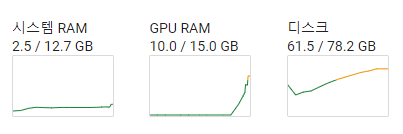